# FlakyPipeline

## Business Understanding
Ogni volta che viene scritto un nuovo codice per sviluppare o aggiornare software, una pagina Web o un'app, deve essere testato durante tutto il processo di sviluppo per assicurarsi che l'applicazione faccia ciò che dovrebbe fare quando viene rilasciata per l'uso. Logicamente, quando viene sottoposto allo stesso test più e più volte, il codice produrrà lo stesso risultato: l'applicazione funzionerà correttamente ogni volta, superando così il test, o non funzionerà correttamente ogni volta, fallendo così il test.

Tuttavia, apparentemente a caso, occasionalmente lo stesso test produrrà risultati diversi. A volte mostrerà che il codice ha superato il test e l'applicazione ha funzionato come pianificato, e talvolta mostrerà che il codice non ha superato il test e non ha funzionato come previsto. Quando succede questo, il test è considerato flaky.

I flaky possono essere causati da vari fattori:
1. un problema con il codice appena scritto
2. un problema con il test stesso
3. alcuni fattori esterni che compromettono i risultati del test

Non è sempre facile individuare tali testi, può capitare che eseguiamo un test 10000 volte ed avremo sempre lo stesso risultato, ma se eseguissimo il test un ulteriore volta avremo un risultato diverso. Lo scopo di "FlakyPipeline" e di utilizzare il machine learnig per determinare se un test può essere considerato flaky oppure no.




## Data Understanding

In [9]:
import pandas
import os
from model_test import get_object_colum

DATASET_NAME='datasetFlakyTest.csv'

def loadingDataSet(datasetname):
    current_directory=os.getcwd()
    csv_path = os.path.join(current_directory, datasetname)
    return pandas.read_csv(csv_path)


dataset=loadingDataSet(DATASET_NAME)
dataset.head()


,Unnamed: 0,nameProject,testCase,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,...,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode,isFlaky
0,0,alluxio,tachyon.MasterClientTest.before,6.0,3.0,0.000000,0.0,0.0,0,0.0,...,194.0,5059.0,381.0,3249.520088,0,228,0,0.0,117.0,0
1,1,alluxio,tachyon.MasterClientTest.after,4.0,2.0,0.000000,0.0,0.0,0,0.0,...,194.0,5059.0,381.0,3249.520088,0,228,0,0.0,117.0,0
2,2,alluxio,tachyon.MasterClientTest.openCloseTest,13.0,2.0,0.846154,4.0,4.0,6,0.0,...,194.0,5059.0,381.0,3249.520088,0,228,0,0.0,117.0,1
3,3,alluxio,tachyon.WorkerServiceHandlerTest.before,9.0,3.0,0.000000,0.0,0.0,0,0.0,...,13.0,297.0,80.0,455.498571,0,0,0,0.0,0.0,0
4,4,alluxio,tachyon.WorkerServiceHandlerTest.after,5.0,2.0,0.000000,0.0,0.0,0,0.0,...,13.0,297.0,80.0,455.498571,0,0,0,0.0,0.0,0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12921 entries, 0 to 12920
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12921 non-null  int64  
 1   nameProject               12921 non-null  object 
 2   testCase                  12921 non-null  object 
 3   tloc                      12921 non-null  float64
 4   tmcCabe                   12921 non-null  float64
 5   assertionDensity          12921 non-null  float64
 6   assertionRoulette         12921 non-null  float64
 7   mysteryGuest              12921 non-null  float64
 8   eagerTest                 12921 non-null  int64  
 9   sensitiveEquality         12921 non-null  float64
 10  resourceOptimism          12921 non-null  int64  
 11  conditionalTestLogic      12921 non-null  float64
 12  fireAndForget             12921 non-null  float64
 13  testRunWar                12921 non-null  float64
 14  loc   


| Features | Descrizione |
| --- | --- | 
| Id ||
| NameProject | |
| TestCase | |
| tloc | Numero di righe di codice della test suit |
| tmcCabe | Somma delle complessità ciclomatiche di tutti i metodi di una classe |
| assertionDensity | Percentuali di asserzioni presenti nella test suit |
| assertionRoulette | Metrica che indica se il test ha più di una asserzione non documentata |
| mysteryGuest | Metrica che indica se il test utilizza una risorsa esterna (es: database,file ...) |
| eagerTest | Metricha che indica se un test invoca diversi metodi dell'oggetto di produzione.|
| sensitiveEquality | Indica se il metodo toString e utilizzado nel test|
| resourceOptimism | Metodo che fa assunzioni ottimistiche sull'esistenza di una risorsa (es file) utilizzata all'interno di esso |
| conditionalTestLogic ||
| fireAndForget | Test che termina prematuramente in quanto non aspetta le risposte delle chiamate esterne |
| loc | line di codice comprendendo anche i commenti | 
| locm2 |  | 
| locm5 |  |
| cbo | Numero di dipendenze di una classe con altre classi |
| wmc | Somma delle complessità ciclomatiche di tutti i metodi di una classe | 
| rfc | Numero di metodi (compresi quelli ereditari) che possono essere chiamati da altre classi |
| mpc |  |
| halsteadVocabulary | Gaussian |
| halsteadLength | Numero totale di operatori e operandi distinti un una funzione |
| halsteadVolume | Memoria (in bit) necessaria per memorizzare il programma |
| classDataShouldBePrivate | Classe che espone i suoi attributi, violando il principio dell'information hiding. |
| complexClass | Complessita ciclomatica di una classe, ovvero il numero di cammini linearmente indipendeti all'interno della classe|
| functionalDecomposition | Metrica che indica se in una classe ereditarietà e polimorfismo sono utilizzate in modo sbagliato. |
| godClass | Classe di grandi dimensioni che implementa diverse responsabilità |
| spaghettiCode | Classe non possiedie una struttura coerente ad esempio un metodo eccessivamente lungo che non possiede parametri |
| isFlaky | Booleano che indica se il test è flaky oppure no |

In [3]:
dataset.describe(include='all')

,Unnamed: 0,nameProject,testCase,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,...,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode,isFlaky
count,12921.000000,12921,12921,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,...,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000,12921.000000
unique,NaN,18,12248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,spring-boot,com.github.kevinsawicki.http.HttpRequestTest.h...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2153,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7447.309806,NaN,NaN,9.611176,2.195883,0.105966,1.076697,0.304388,1.287207,0.033357,...,40.906509,1234.074298,260.828651,1980.537111,0.850940,17.936615,0.127776,0.106571,63.055646,0.048216
std,4059.759743,NaN,NaN,9.938918,0.954751,0.193437,2.382161,1.462637,2.336598,0.239100,...,75.250361,2173.760053,345.176128,3174.500472,4.882227,95.146158,0.458497,12.744702,315.583949,0.214231
min,0.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.000000,7.000000,13.621371,0.000000,0.000000,0.000000,-70.000000,0.000000,0.000000
25%,4440.000000,NaN,NaN,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,229.000000,80.000000,448.192538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7670.000000,NaN,NaN,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,16.000000,518.000000,146.000000,918.373921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10900.000000,NaN,NaN,11.000000,3.000000,0.166667,1.000000,0.000000,2.000000,0.000000,...,43.000000,1295.000000,285.000000,2051.426451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Il dataset da utlizzare non possiede valori nulli, pertando non sara necessario eseguire operazioni di "Data Cleaning" tuttavia, risulta essere sbilanciato in quanto sono presenti 9115/9785 campioni di test la cui label isFlaky e False.
Dal dataset vengono rimossi i test case di setup e teardown, in quanto solitamente essi non contengono porzioni di codice flaky. Inoltre il dataset da utlizzare non possiede valori nulli, pertando non sara necessario eseguire operazioni di "Data Cleaning". Tuttavia, risulta essere sbilanciato in quanto sono presenti 623/12921 campioni di test la cui label isFlaky e True.



In [10]:
dataset_copy=dataset.copy()
dataset_copy = dataset_copy[dataset_copy['testCase'].str.lower().str.contains('.setup|.teardown') == False] #Rimuovo dal dataset i campioni di setup e teardown
dataset_copy=dataset_copy.reset_index()
dataset_copy=dataset_copy.drop(['Unnamed: 0','index'],axis=1) #Rimuovo dal dataset gli indici

### Partizionamento DataSet
Prima di manipolare il dataset, esso verra diviso in train-set(80%) e test-set(20%).
Il tain-set sarà utlizzato per l'identificazione di un modello predittivo, mentre il test-set verrà utilizzato per testare l'algoritmo di machine learnin.
Per il partizionamento del dataset viene adottato un campionamento statificato in modo tale da avere le stesse proporzioni di test flaky (False, True) tra il dataset di test e quello di training


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index_stratified,test_index_stratified in split.split(dataset_copy,dataset_copy['isFlaky']):
    train_set=dataset_copy.loc[train_index_stratified]
    test_set=dataset_copy.loc[test_index_stratified]

print("Dimensione Train-set ",len(train_set))
print("Dimensione Test-set ",len(test_set))

train_set=train_set.drop_duplicates()
test_set = test_set.drop_duplicates()


Dimensione Train-set  9722
Dimensione Test-set  2431


### Pipeline senza nessuna fase di feature engineering

Prestazioni train set


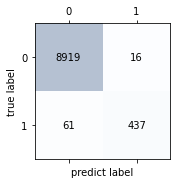

Accuracy: 0.992
Precision: 0.965
Recall: 0.878
F1: 0.919
Prestazioni senza feature engineering:


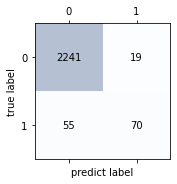

Accuracy: 0.969
Precision: 0.787
Recall: 0.560
F1: 0.654


In [6]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
def print_performance_model(y_true,y_pred):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predict label')
    plt.ylabel('true label')
    plt.show()
    print("Accuracy: %.3f" % accuracy_score(y_true=y_true, y_pred=y_pred))
    print("Precision: %.3f" % precision_score(y_true=y_true, y_pred=y_pred))
    print("Recall: %.3f" % recall_score(y_true=y_true, y_pred=y_pred))
    print("F1: %.3f" % f1_score(y_true=y_true, y_pred=y_pred))
    
def get_object_colum(dataset):
    drop_col = []
    for col in dataset.columns:
        if dataset[col].dtypes == 'object':
            drop_col.append(col)
    return drop_col



train_set_copy=train_set.copy() #Lavoro sempre su una copia del train set
#1. Rimuovo dal dataset le feature che sono object
train_set_copy=train_set_copy.drop(get_object_colum(train_set_copy),axis=1)
#2. Divido le etichette dai campioni converto tutto in un array numpy
X_train_set=train_set_copy.drop(['isFlaky'],axis=1)
y_train_set= train_set_copy['isFlaky']
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
#3. Addesto il classificatore RandomForest sul train_set
clf=RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set,y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
#4. Applico le stesse operazioni al test set e verifico le prestazioni del modello
test_set_copy=test_set.copy()
test_set_copy=test_set_copy.drop(get_object_colum(test_set_copy),axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
y_pred=clf.predict(X=X_test_set)
#5. Genero la matrice di confusione e le prestazioni del modello
print("Prestazioni senza feature engineering:")
print_performance_model(y_true=y_test_set,y_pred=y_pred)

### Pipeline con fase di feature engineering(Feature Scale:Standardizzazione)


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np
train_set_copy=train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
columns=X_train_set.columns
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
#Inserisco l'operazione di feature scale
print("Train set non standardizzato")
dataset_scalato = pandas.DataFrame(X_train_set,columns=columns)
dataset_scalato.describe()

Train set non standardizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
count,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,...,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.0,9433.000000
mean,9.994063,2.188911,0.116610,1.172268,0.319941,1.395420,0.035196,0.025973,0.666596,0.012509,...,55.509488,38.405279,1171.050249,249.670094,1872.575836,0.591540,13.141948,0.128909,0.0,47.282731
std,10.313695,0.963683,0.201153,2.495268,1.505659,2.407163,0.248898,0.206098,1.725441,0.130457,...,91.819130,70.011164,2037.511966,317.595515,2909.384044,4.015729,79.854836,0.460165,0.0,267.420370
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,7.000000,13.621371,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.000000,235.000000,81.000000,455.498571,0.000000,0.000000,0.000000,0.0,0.000000
50%,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,26.000000,16.000000,518.000000,146.000000,903.879896,0.000000,0.000000,0.000000,0.0,0.000000
75%,12.000000,3.000000,0.181818,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,62.000000,43.000000,1285.000000,283.000000,2042.744045,0.000000,0.000000,0.000000,0.0,0.000000
max,194.000000,9.000000,1.788732,47.000000,24.000000,42.000000,6.000000,5.000000,42.000000,5.000000,...,614.000000,514.000000,22282.000000,2098.000000,19973.635455,30.000000,583.000000,2.000000,0.0,2029.000000


In [8]:
sc=StandardScaler()
sc.fit(X=X_train_set)
X_train_set=sc.transform(X=X_train_set)
print("Train set standardizzato")
dataset_scalato = pandas.DataFrame(X_train_set,columns=columns)
dataset_scalato.describe()

Train set standardizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
count,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,...,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9433.0,9.433000e+03
mean,-7.683172e-17,-1.683519e-16,1.242866e-16,-4.820814e-17,-9.792278e-18,-1.393516e-17,3.314309e-17,-5.574066e-17,-1.544167e-17,-1.167541e-17,...,-3.013009e-18,1.054553e-17,-2.259756e-18,-3.992236e-17,-5.122114e-17,-7.909147e-18,1.280529e-17,-1.807805e-17,0.0,-1.506504e-18
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,...,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,0.0,1.000053e+00
min,-8.720967e-01,-1.233781e+00,-5.797386e-01,-4.698211e-01,-2.125034e-01,-5.797258e-01,-1.414131e-01,-1.260276e-01,-3.863542e-01,-9.589307e-02,...,-6.045846e-01,-5.485884e-01,-5.713399e-01,-7.641259e-01,-6.389851e-01,-1.473136e-01,-1.645817e-01,-2.801514e-01,0.0,-1.768199e-01
25%,-4.842423e-01,-1.960409e-01,-5.797386e-01,-4.698211e-01,-2.125034e-01,-5.797258e-01,-1.414131e-01,-1.260276e-01,-3.863542e-01,-9.589307e-02,...,-5.065606e-01,-5.200200e-01,-4.594328e-01,-5.311128e-01,-4.870970e-01,-1.473136e-01,-1.645817e-01,-2.801514e-01,0.0,-1.768199e-01
50%,-2.903152e-01,-1.960409e-01,-5.797386e-01,-4.698211e-01,-2.125034e-01,-1.642769e-01,-1.414131e-01,-1.260276e-01,-3.863542e-01,-9.589307e-02,...,-3.214042e-01,-3.200413e-01,-3.205306e-01,-3.264391e-01,-3.329733e-01,-1.473136e-01,-1.645817e-01,-2.801514e-01,0.0,-1.768199e-01
75%,1.945028e-01,8.416995e-01,3.241902e-01,-6.904135e-02,-2.125034e-01,2.511719e-01,-1.414131e-01,-1.260276e-01,1.932385e-01,-9.589307e-02,...,7.069176e-02,6.563188e-02,5.592889e-02,1.049501e-01,5.849253e-02,-1.473136e-01,-1.645817e-01,-2.801514e-01,0.0,-1.768199e-01
max,1.784188e+01,7.068142e+00,8.313138e+00,1.836683e+01,1.572821e+01,1.686913e+01,2.396611e+01,2.413558e+01,2.395654e+01,3.823289e+01,...,6.082830e+00,6.793487e+00,1.036169e+01,5.820069e+00,6.221942e+00,7.323705e+00,7.136553e+00,4.066343e+00,0.0,7.410888e+00


Prestazioni train set


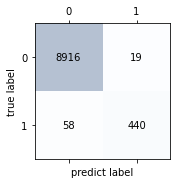

Accuracy: 0.992
Precision: 0.959
Recall: 0.884
F1: 0.920
Prestazioni con standardizzazione:


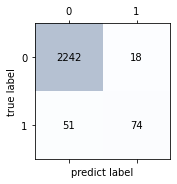

Accuracy: 0.971
Precision: 0.804
Recall: 0.592
F1: 0.682


In [9]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
#Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set=sc.transform(X=X_test_set)
y_pred = clf.predict(X=X_test_set)
print("Prestazioni con standardizzazione:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

### Pipeline con fase di feature engineering(Feature Scale:Normalizzazione MAX)


In [10]:
from sklearn.preprocessing import Normalizer
#2 Provo la normalizzazione min-max
train_set_copy=train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
columns=X_train_set.columns
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
print("Train set non normalizzato")
dataset_scalato = pandas.DataFrame(X_train_set,columns=columns)
dataset_scalato.describe()


Train set non normalizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
count,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,...,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.0,9433.000000
mean,9.994063,2.188911,0.116610,1.172268,0.319941,1.395420,0.035196,0.025973,0.666596,0.012509,...,55.509488,38.405279,1171.050249,249.670094,1872.575836,0.591540,13.141948,0.128909,0.0,47.282731
std,10.313695,0.963683,0.201153,2.495268,1.505659,2.407163,0.248898,0.206098,1.725441,0.130457,...,91.819130,70.011164,2037.511966,317.595515,2909.384044,4.015729,79.854836,0.460165,0.0,267.420370
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,7.000000,13.621371,0.000000,0.000000,0.000000,0.0,0.000000
25%,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.000000,235.000000,81.000000,455.498571,0.000000,0.000000,0.000000,0.0,0.000000
50%,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,26.000000,16.000000,518.000000,146.000000,903.879896,0.000000,0.000000,0.000000,0.0,0.000000
75%,12.000000,3.000000,0.181818,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,62.000000,43.000000,1285.000000,283.000000,2042.744045,0.000000,0.000000,0.000000,0.0,0.000000
max,194.000000,9.000000,1.788732,47.000000,24.000000,42.000000,6.000000,5.000000,42.000000,5.000000,...,614.000000,514.000000,22282.000000,2098.000000,19973.635455,30.000000,583.000000,2.000000,0.0,2029.000000


In [11]:
#Inserisco l'operazione di feature scale
norm=Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set=norm.transform(X=X_train_set)
print("Train set normalizzato")
dataset_scalato = pandas.DataFrame(X_train_set,columns=columns)
dataset_scalato.describe()


Train set normalizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
count,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,...,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.000000,9433.0,9433.000000
mean,0.020172,0.004590,0.000242,0.002356,0.000363,0.001644,0.000049,0.000037,0.001115,0.000027,...,0.031619,0.018700,0.564978,0.166627,0.985714,0.000078,0.000939,0.000583,0.0,0.003142
std,0.048716,0.008484,0.000914,0.009161,0.002448,0.003432,0.000484,0.000421,0.004686,0.000477,...,0.020824,0.018981,0.158075,0.044397,0.074221,0.000706,0.005647,0.002739,0.0,0.016502
min,0.000096,0.000032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.106061,0.018141,0.129405,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.003372,0.000945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017168,0.002900,0.446968,0.139084,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.008088,0.002108,0.000000,0.000000,0.000000,0.000542,0.000000,0.000000,0.000000,0.000000,...,0.027976,0.015307,0.538782,0.158481,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.017817,0.004348,0.000154,0.001608,0.000000,0.001841,0.000000,0.000000,0.000459,0.000000,...,0.041231,0.026109,0.660893,0.181912,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,0.136364,0.032489,0.212400,0.074037,0.061728,0.018509,0.013951,0.112970,0.019933,...,0.143411,0.122454,1.000000,0.389871,1.000000,0.011261,0.045068,0.039866,0.0,0.117409


Prestazioni train set


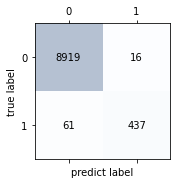

Accuracy: 0.992
Precision: 0.965
Recall: 0.878
F1: 0.919
Prestazioni con normalizzazione:


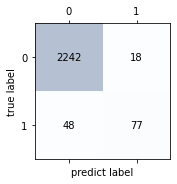

Accuracy: 0.972
Precision: 0.811
Recall: 0.616
F1: 0.700


In [12]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
#Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set=norm.transform(X=X_test_set)
y_pred = clf.predict(X=X_test_set)
print("Prestazioni con normalizzazione:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

### Pipeline con fase di feature engineering(Feature Scale:Normalizzazione MAX, Feature Construct: PCA)


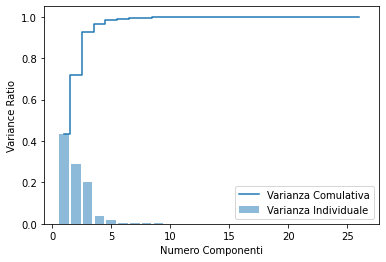

In [13]:
from sklearn.decomposition import PCA
def get_varianza_comulativa(dataset):
    # Costruisco la matrice di covarianza
    cov_mat = np.cov(dataset.T)
    # Decompongo la matrice di covarianza in un vettore composto dagli autovalori e i corrispondenti autovalori conservati come colonne in una matrice 25x25
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.bar(range(1, 27), var_exp, alpha=0.5, align='center', label='Varianza Individuale')
    plt.step(range(1, 27), cum_var_exp, where='mid', label='Varianza Comulativa')
    plt.ylabel('Variance Ratio')
    plt.xlabel('Numero Componenti')
    plt.legend(loc='best')
    plt.show()


train_set_copy = train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
norm = Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set = norm.transform(X=X_train_set)
get_varianza_comulativa(X_train_set)



Components =  10 ;
Total explained variance =  0.9988
Prestazioni train set


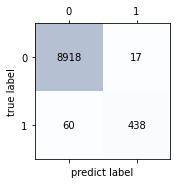

Accuracy: 0.992
Precision: 0.963
Recall: 0.880
F1: 0.919
Prestazioni con pca a 10 componenti:


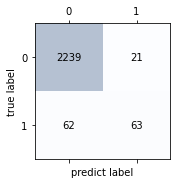

Accuracy: 0.965
Precision: 0.750
Recall: 0.504
F1: 0.603


In [14]:
pca = PCA(n_components=10)
pca.fit(X_train_set)
X_train_set=pca.transform(X_train_set)
print("Components = ", pca.n_components_, ";\nTotal explained variance = ",round(pca.explained_variance_ratio_.sum(), 5))
clf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
# Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set = norm.transform(X=X_test_set)
X_test_set=pca.transform(X_test_set)
y_pred = clf.predict(X=X_test_set)
print("Prestazioni con pca a 10 componenti:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

### Pipeline con fase di feature engineering(Feature Scale:Normalizzazione MAX, Feature Select: Random Forest)

In [12]:
import numpy as np
import pandas
import os

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer
from sklearn import tree

from model_test import get_object_colum

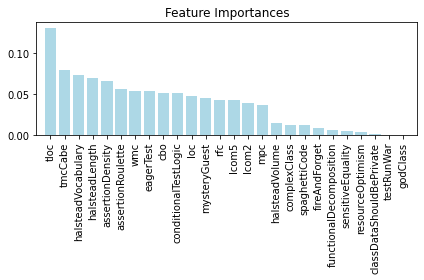

In [13]:
from boruta import BorutaPy
train_set_copy=train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
columns=X_train_set.columns
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
norm=Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set=norm.transform(X=X_train_set)

df=pandas.DataFrame(X_train_set,columns=columns)
rf_fs=RandomForestClassifier(n_estimators=len(X_train_set),random_state=0,n_jobs=-1)
rf_fs.fit(X=X_train_set,y=y_train_set)
importance=rf_fs.feature_importances_
indices=np.argsort(importance)[::-1]
colum_remove=[]
for f in range (X_train_set.shape[1]):
    if importance[indices[f]] < 0.02:
        colum_remove.append(columns[indices[f]])
        
plt.title('Feature Importances')
plt.bar(range(X_train_set.shape[1]),importance[indices],color = 'lightblue',align = 'center')
plt.xticks(range(X_train_set.shape[1]),columns[indices], rotation = 90)
plt.xlim([-1, X_train_set.shape[1]])
plt.tight_layout()
plt.show()
df=df.drop(colum_remove,axis=1)
X_train_set=df.to_numpy()






In [16]:
def print_performance_model(y_true,y_pred):
    print("Accuracy: %.3f" % accuracy_score(y_true=y_true, y_pred=y_pred))
    print("Precision: %.3f" % precision_score(y_true=y_true, y_pred=y_pred))
    print("Recall: %.3f" % recall_score(y_true=y_true, y_pred=y_pred))
    print("F1: %.3f" % f1_score(y_true=y_true, y_pred=y_pred))

In [17]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
#Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set=norm.transform(X=X_test_set)
df=pandas.DataFrame(X_test_set,columns=columns)
df=df.drop(colum_remove,axis=1)
X_test_set=df.to_numpy()
y_pred = clf.predict(X=X_test_set)
print("Prestazioni con Feature Selection:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

Prestazioni train set
Accuracy: 0.992
Precision: 0.959
Recall: 0.884
F1: 0.920
Prestazioni con Feature Selection:
Accuracy: 0.970
Precision: 0.793
Recall: 0.584
F1: 0.673


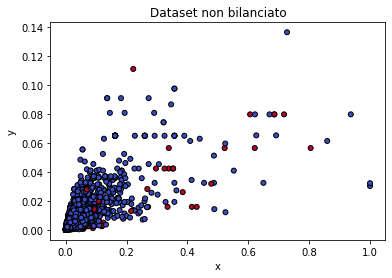

In [18]:
from imblearn.over_sampling import SMOTE
train_set_copy = train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
columns=X_train_set.columns
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
norm = Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set = norm.transform(X=X_train_set)

df=pandas.DataFrame(X_train_set,columns=columns)
rf_fs=RandomForestClassifier(n_estimators=len(X_train_set),random_state=0,n_jobs=-1)
rf_fs.fit(X=X_train_set,y=y_train_set)
importance=rf_fs.feature_importances_
indices=np.argsort(importance)[::-1]
colum_remove=[]
for f in range (X_train_set.shape[1]):
    if importance[indices[f]] < 0.02:
        colum_remove.append(columns[indices[f]])       
df=df.drop(colum_remove,axis=1)
X_train_set=df.to_numpy()


ds = pandas.DataFrame(X_train_set)
plt.title('Dataset non bilanciato')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(ds.iloc[:, 0],ds.iloc[:, 1], marker='o', c=y_train_set,
        s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()




### Pipeline con fase di feature engineering(Feature Scale:Normalizzazione MAX, Feature Select, Datala Balancing: SMOTE)

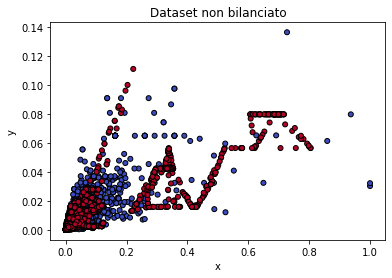

In [19]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_train_set, y_train_set = sm.fit_resample(X_train_set, y_train_set)

ds = pandas.DataFrame(X_train_set)
plt.title('Dataset non bilanciato')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(ds.iloc[:, 0], ds.iloc[:, 1], marker='o', c=y_train_set,s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

Prestazioni train set


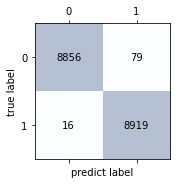

Accuracy: 0.995
Precision: 0.991
Recall: 0.998
F1: 0.995
Prestazioni con smote:


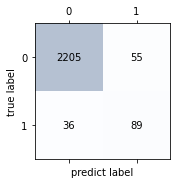

Accuracy: 0.962
Precision: 0.618
Recall: 0.712
F1: 0.662


In [19]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=clf.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
# Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set = norm.transform(X=X_test_set)
df=pandas.DataFrame(X_test_set,columns=columns)
df=df.drop(colum_remove,axis=1)
X_test_set=df.to_numpy()
y_pred = clf.predict(X=X_test_set)
print("Prestazioni con smote:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

### Pipeline con fase di feature engineering+ ensemble(RF,SVM,KNN)

Prestazioni train set


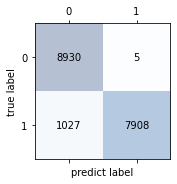

Accuracy: 0.942
Precision: 0.999
Recall: 0.885
F1: 0.939
Prestazioni con ensemble:


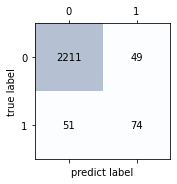

Accuracy: 0.958
Precision: 0.602
Recall: 0.592
F1: 0.597


In [20]:
from MajorityVoteClassifier import MajorityVoteClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
train_set_copy = train_set.copy()
train_set_copy = train_set_copy.drop(get_object_colum(train_set_copy), axis=1)
X_train_set = train_set_copy.drop(['isFlaky'], axis=1)
y_train_set = train_set_copy['isFlaky']
columns=X_train_set.columns
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
norm = Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set = norm.transform(X=X_train_set)
df=pandas.DataFrame(X_train_set,columns=columns)
rf_fs=RandomForestClassifier(n_estimators=len(X_train_set),random_state=0,n_jobs=-1)
rf_fs.fit(X=X_train_set,y=y_train_set)
importance=rf_fs.feature_importances_
indices=np.argsort(importance)[::-1]
colum_remove=[]
for f in range (X_train_set.shape[1]):
    if importance[indices[f]] < 0.02:
        colum_remove.append(columns[indices[f]])       
df=df.drop(colum_remove,axis=1)
X_train_set=df.to_numpy()
sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)


X_train_set, y_train_set = sm.fit_resample(X_train_set, y_train_set)
clf1 = SVC(C=100.0, kernel='rbf')
clf2 = RandomForestClassifier(criterion='entropy', n_estimators=150)
clf3 = KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2, weights='uniform')
ensemble = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])
ensemble.fit(X=X_train_set, y=y_train_set)
print("Prestazioni train set")
y_pred=ensemble.predict(X=X_train_set)
print_performance_model(y_true=y_train_set,y_pred=y_pred)
 # Valuto le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set = norm.transform(X=X_test_set)
df=pandas.DataFrame(X_test_set,columns=columns)
df=df.drop(colum_remove,axis=1)
X_test_set=df.to_numpy()
y_pred = ensemble.predict(X=X_test_set)
print("Prestazioni con ensemble:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

### Pipeline con fase di feature engineering+ MLP

Prestazioni train set


C:\Users\angel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


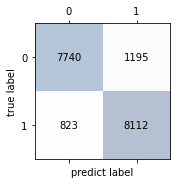

Accuracy: 0.887
Precision: 0.872
Recall: 0.908
F1: 0.889
Prestazioni con MLP:


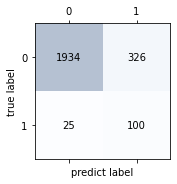

Accuracy: 0.853
Precision: 0.235
Recall: 0.800
F1: 0.363


In [21]:
from sklearn.neural_network import MLPClassifier
train_set_copy=train_set.copy() #Lavoro sempre su una copia del train set
#1. Rimuovo dal dataset le feature che sono object
train_set_copy=train_set_copy.drop(get_object_colum(train_set_copy),axis=1)
#2. Divido le etichette dai campioni converto tutto in un array numpy
X_train_set=train_set_copy.drop(['isFlaky'],axis=1)
y_train_set= train_set_copy['isFlaky']
columns=X_train_set.columns #Salvo il nome delle colonne
X_train_set = X_train_set.to_numpy()
y_train_set = y_train_set.to_numpy()
norm = Normalizer(norm='max')
norm.fit(X=X_train_set)
X_train_set = norm.transform(X=X_train_set)
df = pandas.DataFrame(X_train_set, columns=columns)
rf_fs = RandomForestClassifier(n_estimators=len(X_train_set), random_state=0, n_jobs=-1)
rf_fs.fit(X=X_train_set, y=y_train_set)
importance = rf_fs.feature_importances_
indices = np.argsort(importance)[::-1]
colum_remove = []
for f in range(X_train_set.shape[1]):
    if importance[indices[f]] < 0.02:
        colum_remove.append(columns[indices[f]])
df = df.drop(colum_remove, axis=1)
X_train_set = df.to_numpy()
sm = SMOTE(sampling_strategy='all', k_neighbors=3, random_state=42)
X_train_set, y_train_set = sm.fit_resample(X_train_set, y_train_set)
#3. Addesto il classificatore RandomForest sul train_set
clf = MLPClassifier(max_iter=100,activation='relu',alpha=0.0001,hidden_layer_sizes=(50,100,50),learning_rate='constant',solver='adam')
clf.fit(X=X_train_set, y=y_train_set)
y_pred = clf.predict(X_train_set)
print("Prestazioni train set")
print_performance_model(y_true=y_train_set, y_pred=y_pred)
# 4. Applico le stesse operazioni al test set e verifico le prestazioni del modello
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set = norm.transform(X=X_test_set)
df = pandas.DataFrame(X_test_set, columns=columns)
df = df.drop(colum_remove, axis=1)
X_test_set = df.to_numpy()
y_pred = clf.predict(X=X_test_set)
# 5. Genero la matrice di confusione e le prestazioni del modello
print("Prestazioni con MLP:")
print_performance_model(y_true=y_test_set, y_pred=y_pred)

## Surrogato globale
Creiamo un modello decision tree surrogato per la RandomForest

[Text(0.47323139764167665, 0.9857142857142858, 'X[15] <= 0.131\ngini = 0.5\nsamples = 17870\nvalue = [8935, 8935]'),
 Text(0.18564629959776635, 0.9571428571428572, 'X[9] <= 0.002\ngini = 0.358\nsamples = 4982\nvalue = [1162, 3820]'),
 Text(0.12634348725566755, 0.9285714285714286, 'X[11] <= 0.021\ngini = 0.313\nsamples = 4728\nvalue = [919, 3809]'),
 Text(0.05086465934077363, 0.9, 'X[14] <= 0.775\ngini = 0.497\nsamples = 960\nvalue = [514, 446]'),
 Text(0.019857740505994502, 0.8714285714285714, 'X[6] <= 0.0\ngini = 0.356\nsamples = 492\nvalue = [378, 114]'),
 Text(0.007099974259126526, 0.8428571428571429, 'X[2] <= 0.0\ngini = 0.096\nsamples = 317\nvalue = [301, 16]'),
 Text(0.003549987129563263, 0.8142857142857143, 'X[6] <= 0.0\ngini = 0.028\nsamples = 284\nvalue = [280, 4]'),
 Text(0.0017749935647816315, 0.7857142857142857, 'gini = 0.0\nsamples = 266\nvalue = [266, 0]'),
 Text(0.005324980694344895, 0.7857142857142857, 'X[9] <= 0.0\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0

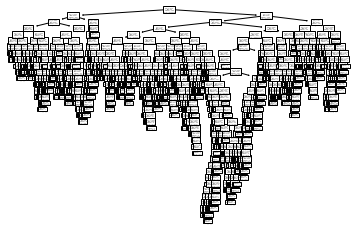

In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train_set, y=y_train_set)
clf.predict(X=X_train_set)
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(get_object_colum(test_set_copy), axis=1)
X_test_set = test_set_copy.drop(['isFlaky'], axis=1).to_numpy()
y_test_set = test_set_copy['isFlaky'].to_numpy()
X_test_set = norm.transform(X=X_test_set)
df=pandas.DataFrame(X_test_set,columns=columns)
df=df.drop(colum_remove,axis=1)
X_test_set=df.to_numpy()
y_pred = clf.predict(X=X_test_set)
tree.plot_tree(clf)